In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [219]:
train=pd.read_csv("housetrain.csv",encoding = 'latin-1')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [220]:
test=pd.read_csv("housetest.csv",encoding = 'latin-1')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [221]:
cols_with_missing = [col for col in train.columns
                     if train[col].isnull().any()]
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [222]:
trains=train.drop(cols_with_missing,axis=1)
trains.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [223]:


tests=test.drop(cols_with_missing,axis=1)
tests.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [224]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [225]:
s = (trains.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


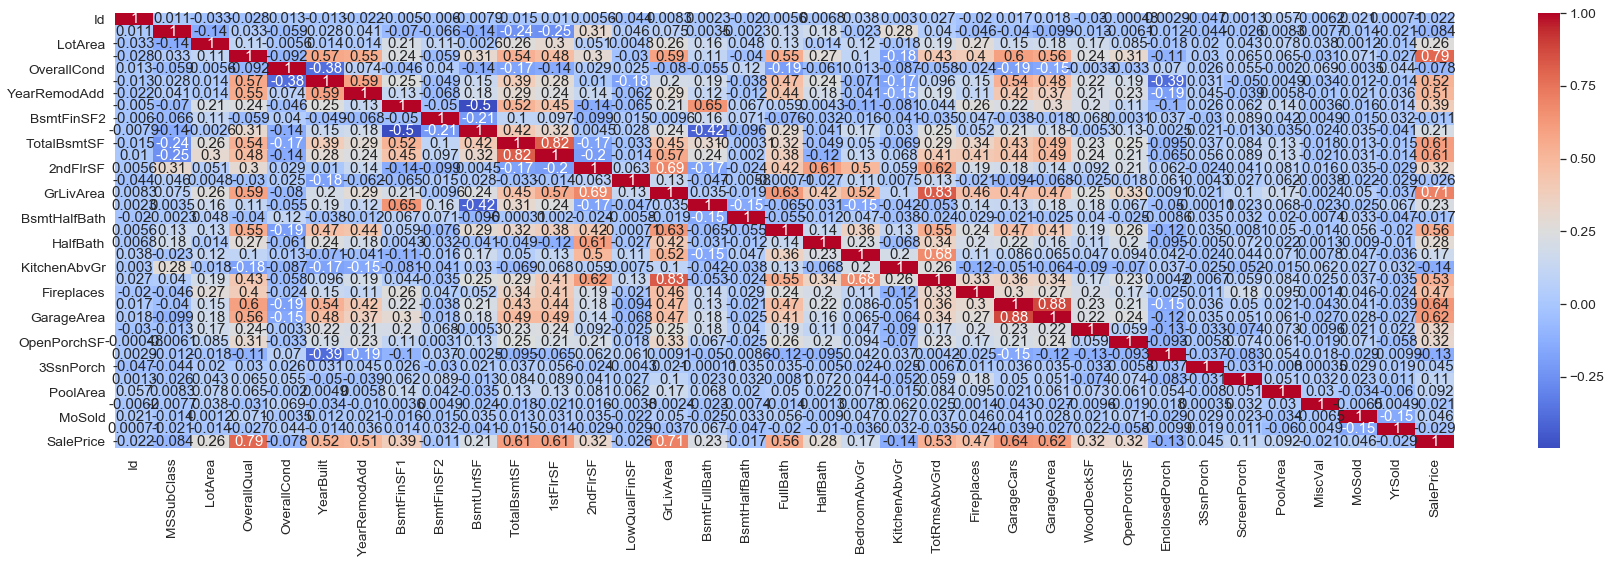

In [226]:
plt.figure(figsize=(30,8))
sns.heatmap(trains.corr(),cmap='coolwarm',annot = True)
plt.show()


In [227]:
corr=trains.corr()

In [228]:
corr[corr["SalePrice"]>0.3].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [229]:
trains=trains[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice']]
tests=tests[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ]]

In [230]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
BsmtFinSF1      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
WoodDeckSF      1460 non-null int64
OpenPorchSF     1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(16)
memory usage: 182.6 KB


In [231]:
trains.isnull().sum().sort_values(ascending = False)

SalePrice       0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [232]:
tests.isnull().sum().sort_values(ascending = False)

GarageArea      1
GarageCars      1
TotalBsmtSF     1
BsmtFinSF1      1
OpenPorchSF     0
WoodDeckSF      0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [233]:
tests=tests.fillna(X_test.mean())

In [235]:
tests.isnull().sum().sort_values(ascending = False)

OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [236]:
trains.shape

(1460, 16)

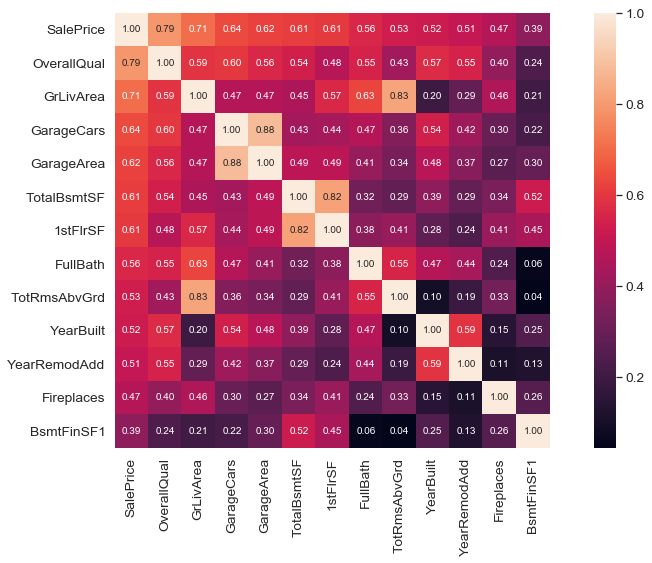

In [237]:
k=13
plt.figure(figsize=(16,8))
corrmat=trains.corr()
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
cm=np.corrcoef(trains[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [238]:
trains=trains[cols]

In [261]:
tests=tests[cols.drop('SalePrice')]

In [262]:
trains.shape

(1460, 13)

In [263]:
tests.shape

(1459, 12)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(trains.drop("SalePrice",axis=1),trains["SalePrice"],test_size=0.3,random_state=101)

In [265]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
X=StandardScaler()
Y=StandardScaler()

X_train=X.fit_transform(X_train)
X_test = X.fit_transform(X_test)
y_train = X.fit_transform(y_train)
y_test = Y.fit_transform(y_test)

C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Standa

In [266]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.23568488,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -1.72181167,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.16549575,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ..., -0.25368926,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  0.96974609,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -1.28137495,
        -0.97000815,  1.58388762]])

In [267]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [268]:
pipeline_lr=Pipeline([('pca1',PCA(n_components=2)),
                     ('lr',LinearRegression())])

In [269]:
pipeline_GBR=Pipeline([('pca2',PCA(n_components=2)),
                     ('GBR',GradientBoostingRegressor())])

In [270]:
pipeline_dt=Pipeline([('pca3',PCA(n_components=2)),
                     ('dt',DecisionTreeRegressor())])

In [271]:
pipelines = [pipeline_lr, pipeline_GBR, pipeline_dt]

In [272]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [273]:
pipe_dict = {0: 'LINEAR REG' , 1: 'GBM' , 2:'dt'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [274]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

LINEAR REG Test Accuracy: 0.6880102092025087
GBM Test Accuracy: 0.8203256565649365
dt Test Accuracy: 0.6778097591080443


In [275]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:GBM


In [281]:
test_id = test['Id']
test= pd.DataFrame(test_id, columns=['Id'])

In [282]:
test = X.fit_transform(test)

C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [283]:
tests.shape

(1459, 12)

In [284]:
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train,y_train)
test_predictions=model.predict(tests)
test_predictions= test_predictions.reshape(-1,1)

C:\Users\Pihu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [285]:
test_predictions

array([[-0.67699528],
       [-0.52303276],
       [-0.07040772],
       ...,
       [-0.27560379],
       [-0.75330956],
       [ 0.74929926]])

In [290]:
test_predictions =Y.inverse_transform(test_predictions)

In [291]:
test_predictions = pd.DataFrame(test_predictions, columns=['SalePrice'])

In [292]:
test_predictions.head()

,SalePrice
0,125613.007441
1,137826.450466
2,173732.007079
3,184552.183631
4,200654.893732
